In [ ]:
import matplotlib.pyplot as plt

# 数据
bit_widths = ['int8', 'int4', 'int3', 'int2', 'int1']
gate_perplexity = [3.8408, 3.8745, 4.0060, 4.7061, 1066.8996]
down_perplexity = [3.8420, 3.9153, 4.3935, 8.4007, 1578.4400]
up_perplexity = [3.8411, 3.8713, 3.9863, 4.6662, 576.9580]

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(bit_widths, gate_perplexity, marker='o', label='Gate')
plt.plot(bit_widths, down_perplexity, marker='o', label='Down')
plt.plot(bit_widths, up_perplexity, marker='o', label='Up')

# 添加标题和标签
plt.title('Perplexity vs Quantization Bit Width')
plt.xlabel('Quantization Bit Width')
plt.ylabel('Perplexity')

# 设置 y 轴范围，截断高值部分
plt.ylim(0, 50)  # 设置 y 轴范围为 0 到 50，可以根据需要调整

# 添加图例
plt.legend()

# 显示图形
plt.grid(True)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 设置 Seaborn 风格和配色方案
sns.set(style='ticks', palette='deep', context='paper')
colors = sns.color_palette()
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})

In [ ]:
data_full_model = {
    "Pruning Ratio": [pruning_ratio_13B],
    "Param Reduction": [param_reduction_13B],
    "PPL OpenHermes": [ppl_openhermes_13B],
    "PPL OpenOrca": [ppl_openorca_13B]
}
param_reduction = [1, 4.82, 6.27, 8.21, 13.54]
pts_naive_pruning = np.array([2.58157583, 10.36463987, 38.08802773, 92.20367604, 621.97506282])
ppl_openhermes = [2.222455474443662, 2.2702391861752695, 2.2950409897525628, 2.383298211594573, 2.4934421917524188]
ppl_openorca = [2.325367637014605, 2.312637577046639, 2.3200930035805643, 2.3696964223933423, 2.5021555580646297]


# 创建图形和子图
color_list = ["#4D7787", "#E9BD27", "#D6594C", "#7D8995", "#AAB083", "#CC9564", "#E88C1F"]
sns.set(style='ticks', palette='deep', context='paper')

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 3))


from scipy import stats
# 绘制线条和数据标签
for i in range(len(df)):
    if i == 0: 
        ax2.text(df['Param Reduction'][i], pts_naive_pruning[i]-0.1 , f"{transformed_data[i]:.2f}", 
             horizontalalignment='center', verticalalignment='bottom', fontsize=9, color=color_list[0])
    elif i==4:
        ax.text(df['Param Reduction'][i], pts_naive_pruning[i] - 150, f"{transformed_data[i]:.2f}", 
                horizontalalignment='center', verticalalignment='bottom', fontsize=9, color=color_list[0])
    else:
        ax.text(df['Param Reduction'][i], pts_naive_pruning[i] + 50, f"{transformed_data[i]:.2f}", 
                horizontalalignment='center', verticalalignment='bottom', fontsize=9, color=color_list[0])
ax2.scatter(df_full_model['Param Reduction'], df_full_model['PPL OpenOrca'], color=color_list[1], marker='^', s=75, label='13B LoRA OpenOrca')
ax2.scatter(df_full_model['Param Reduction'], df_full_model['PPL OpenHermes'], color=color_list[2], marker='^',facecolor='none', s=75, label='13B LoRA OpenHermes')
for i in range(len(df_full_model)):
    ax2.text(df_full_model['Param Reduction'][i], df_full_model['PPL OpenOrca'][i] + 0.02, f"{df_full_model['PPL OpenOrca'][i]:.2f}", 
             horizontalalignment='center', verticalalignment='bottom', fontsize=9, color=color_list[1])
    ax2.text(df_full_model['Param Reduction'][i], df_full_model['PPL OpenHermes'][i] + 0.015, f"{df_full_model['PPL OpenHermes'][i]:.2f}", 
             horizontalalignment='center', verticalalignment='bottom', fontsize=9, color=color_list[2])

ax2.plot(df['Param Reduction'], df['PPL OpenOrca'], color=color_list[1], marker='o', markeredgecolor=color_list[1], markersize=8,linestyle='-', label='70B QLoRAM-Stru OpenOrca', zorder=0)
for i in range(len(df)):
    ax2.text(df['Param Reduction'][i], df['PPL OpenOrca'][i]+0.03, f"{df['PPL OpenOrca'][i]:.2f}", 
             horizontalalignment='center', verticalalignment='bottom', fontsize=9, color=color_list[1])

ax2.plot(df['Param Reduction'], df['PPL OpenHermes'], color=color_list[2], marker='o', linestyle=':', markerfacecolor='none',markersize=8, label='70B QLoRAM-Stru OpenHermes', zorder=0)
for i in range(len(df)):
    if i==0:
        ax2.text(df['Param Reduction'][i], df['PPL OpenHermes'][i]+0.02, f"{df['PPL OpenHermes'][i]:.2f}", 
                horizontalalignment='center', verticalalignment='bottom', fontsize=9, color=color_list[2])
    else:
        ax2.text(df['Param Reduction'][i], df['PPL OpenHermes'][i]-0.09, f"{df['PPL OpenHermes'][i]:.2f}", 
                horizontalalignment='center', verticalalignment='bottom', fontsize=9, color=color_list[2])
# 绘制数据
ax.plot(df['Param Reduction'][1:], pts_naive_pruning[1:], color=color_list[0], marker='o', markersize=8, markeredgecolor=color_list[0], markerfacecolor='none', linestyle='--', label='70B (NF4) w/o FT (Naive Pruning)', zorder=0)
ax2.plot(df['Param Reduction'], pts_naive_pruning, color=color_list[0], marker='o', markersize=8, markeredgecolor=color_list[0], markerfacecolor='none', linestyle='--', label='70B (NF4) w/o FT (Naive Pruning)', zorder=0)



# ax.plot(pts)
# ax2.plot(pts)

ax.set_ylim(2.65, 650.)  # outliers only
ax2.set_ylim(2.19, 2.65)  # most of the data
# 设置 y 轴范围
# ax.set_ylim(.78, 1.)  # 离群值
# ax2.set_ylim(0, .22)  # 正常数据

# 隐藏上面的 x 轴
# ax2.xaxis.set_ticks([])

# 隐藏上面的 x 轴刻度和标签
# ax.xaxis.set_visible(False)

# 隐藏两个图之间的边框
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# 设置网格（同时显示 x 和 y 轴的网格）
ax.grid(True, linestyle='--', alpha=0.6, which='both', axis='both')  # 上半图
ax2.grid(True, linestyle='--', alpha=0.6, which='both', axis='both')  # 下半图

# 添加 x 轴的网格线
ax2.xaxis.set_visible(True)  # 确保下半图的 x 轴可见
ax.xaxis.set_ticks_position('none')  # 隐藏上半图的刻度线
fig.text(0.02, 0.54, r'Perplexity on Alpaca ($\downarrow$)', ha='center', va='center',  fontsize=10, rotation=90)
ax2.tick_params(axis='y')
ax2.set_xlabel(r'Parameter Reduction Ratio ($\uparrow$)')

# 绘制切割线
d = .015  # 切割线的大小
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # 切换到底部图
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
# fig.tight_layout()
ax2.legend(loc='upper right',ncol=1, bbox_to_anchor=(0.445, 2.32),columnspacing=2,labelspacing=0.5, frameon=True,fontsize=8)
# 显示图表
plt.subplots_adjust(left=0.1, right=0.98, top=0.95, bottom=0.1, hspace=0.3)
plt.savefig("scaling_laws_for_loram.pdf", dpi=500)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 数据
bit_widths = ['INT8', 'INT4', 'INT3', 'INT2', 'INT1']
gate_perplexity = [5.12, 5.16, 5.31, 6.25, 1130]
down_perplexity = [5.12, 5.27, 5.97, 14.37, 1910]
up_perplexity = [5.12, 5.15, 5.28, 6.18, 520]
all=	[5.12,	5.33,	6.38,	52, 119346]

# 颜色列表
color_list = ["#00B0EC","#FFC000", "#F38181", "#7D8995", "#AAB083", "#CC9564", "#E88C1F"]
sns.set(style='ticks', palette='deep', context='paper')

# 创建图形和子图
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4, 4))

# 绘制上半部分的折线图（高值部分）
ax.plot(bit_widths, gate_perplexity, color=color_list[0], marker='o', markersize=6, linestyle='-', label='Gate', zorder=0)
ax.plot(bit_widths, down_perplexity, color=color_list[1], marker='o', markersize=6, linestyle='-', label='Down', zorder=0)
ax.plot(bit_widths, up_perplexity, color=color_list[2], marker='o', markersize=6, linestyle='-', label='Up', zorder=0)

# 添加数据标签
for i in range(4,5):
    ax.text(bit_widths[i], gate_perplexity[i] + 50, f"{gate_perplexity[i]:.0f}", 
            horizontalalignment='center', verticalalignment='bottom', fontsize=6, color=color_list[0])
    ax.text(bit_widths[i], down_perplexity[i] + 50, f"{down_perplexity[i]:.0f}", 
            horizontalalignment='center', verticalalignment='bottom', fontsize=6, color=color_list[1])
    ax.text(bit_widths[i], up_perplexity[i] + 50, f"{up_perplexity[i]:.0f}", 
            horizontalalignment='center', verticalalignment='bottom', fontsize=6, color=color_list[2])

# 绘制下半部分的折线图（低值部分）
ax2.plot(bit_widths[:-1], gate_perplexity[:-1], color=color_list[0], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ gate}$', zorder=0)
ax2.plot(bit_widths[:-1], down_perplexity[:-1], color=color_list[1], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ down}$', zorder=0)
ax2.plot(bit_widths[:-1], up_perplexity[:-1], color=color_list[2], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ up}$', zorder=0)

# 添加数据标签
# for i in range(len(bit_widths[:-1])):
#     ax2.text(bit_widths[i], gate_perplexity[i] + 0.05, f"{gate_perplexity[i]:.2f}", 
#              horizontalalignment='center', verticalalignment='bottom', fontsize=8, color=color_list[0])
#     ax2.text(bit_widths[i], down_perplexity[i] + 0.05, f"{down_perplexity[i]:.2f}", 
#              horizontalalignment='center', verticalalignment='bottom', fontsize=8, color=color_list[1])
#     ax2.text(bit_widths[i], up_perplexity[i] + 0.05, f"{up_perplexity[i]:.2f}", 
#              horizontalalignment='center', verticalalignment='bottom', fontsize=8, color=color_list[2])

# 设置 y 轴范围
ax.set_ylim(500, 2200)  # 高值部分
ax2.set_ylim(5.1, 6.3)    # 低值部分

# 隐藏上半图的底部边框和下半图的顶部边框
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax2.xaxis.tick_bottom()
ax.xaxis.set_ticks_position('none')  # 隐藏上半图的刻度线
# 添加网格线
ax.grid(True, linestyle='--', alpha=0.6, which='both', axis='both')
ax2.grid(True, linestyle='--', alpha=0.6, which='both', axis='both')

# 添加切割线
d = .015  # 切割线的大小
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # 左上角对角线
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 右上角对角线

kwargs.update(transform=ax2.transAxes)  # 切换到底部图
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 左下角对角线
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 右下角对角线

# 添加图例
ax2.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.32, 2.3), columnspacing=3, labelspacing=0.5, frameon=True, fontsize=10)

# 添加轴标签
fig.text(0.02, 0.5, 'Perplexity on WikiText-2 ($\downarrow$)', ha='center', va='center', fontsize=10, rotation=90)
ax2.set_xlabel('Quantization Bit-Width', fontsize=10)

# 调整布局
plt.subplots_adjust(left=0.15, right=0.98, top=0.9, bottom=0.1, hspace=0.3)
plt.savefig("perplexity_vs_bitwidth.pdf", format="pdf", bbox_inches="tight",dpi=500)
# 显示图形
plt.show()

In [ ]:
plt.savefig("perplexity_vs_bitwidth.pdf", format="pdf", bbox_inches="tight",dpi=500)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 数据
bit_widths = ['INT8', 'INT4', 'INT3', 'INT2', 'INT1']
gate_perplexity = [5.12, 5.16, 5.31, 6.25, 1130]
down_perplexity = [5.12, 5.27, 5.97, 14.37, 1910]
up_perplexity = [5.12, 5.15, 5.28, 6.18, 520]
all_perplexity = [5.12, 5.33, 6.38, 52, 2500]

# 颜色列表
color_list = ["#00B0EC","#FFC000", "#F38181", "#7D8995", "#AAB083", "#CC9564", "#E88C1F"]
sns.set(style='ticks', palette='deep', context='paper')

# 创建图形和子图，调整子图高度比例
fig, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(4, 4), 
                                   gridspec_kw={'height_ratios': [1, 1, 2]})

# 绘制第一个子图（高值部分）
ax.plot(bit_widths, gate_perplexity, color=color_list[0], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ gate}$', zorder=0)
ax.plot(bit_widths, down_perplexity, color=color_list[1], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ gate}$', zorder=0)
ax.plot(bit_widths, up_perplexity, color=color_list[2], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ gate}$', zorder=0)
ax.plot(bit_widths, all_perplexity, color=color_list[3], marker='o', markersize=6, linestyle='-', label='$\mathcal{E}$', zorder=0)


# 绘制第二个子图（中间部分）
ax2.plot(bit_widths[:-1], gate_perplexity[:-1], color=color_list[0], marker='o', markersize=6, linestyle='-', label='Gate', zorder=0)
ax2.plot(bit_widths[:-1], down_perplexity[:-1], color=color_list[1], marker='o', markersize=6, linestyle='-', label='Down', zorder=0)
ax2.plot(bit_widths[:-1], up_perplexity[:-1], color=color_list[2], marker='o', markersize=6, linestyle='-', label='Up', zorder=0)
ax2.plot(bit_widths[:-1], all_perplexity[:-1], color=color_list[3], marker='o', markersize=6, linestyle='-', label='All', zorder=0)

# 绘制第三个子图（低值部分）
ax3.plot(bit_widths[:-1], gate_perplexity[:-1], color=color_list[0], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ gate}$', zorder=0)
ax3.plot(bit_widths[:-1], down_perplexity[:-1], color=color_list[1], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ down}$', zorder=0)
ax3.plot(bit_widths[:-1], up_perplexity[:-1], color=color_list[2], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ up}$', zorder=0)
ax3.plot(bit_widths[:-1], all_perplexity[:-1], color=color_list[3], marker='o', markersize=6, linestyle='-', label='$\mathcal{E}$', zorder=0)

# 设置 y 轴范围
ax.set_ylim(400, 2200)  # 高值部分
ax2.set_ylim(10, 60)    # 中间部分
ax3.set_ylim(5.1, 6.3)  # 低值部分

# 隐藏不必要的边框
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)

# 隐藏刻度线
ax.xaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('none')

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.6, which='both', axis='both')
ax2.grid(True, linestyle='--', alpha=0.6, which='both', axis='both')
ax3.grid(True, linestyle='--', alpha=0.6, which='both', axis='both')

# 添加切割线
d = .015  # 切割线的大小
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # 左上角对角线
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 右上角对角线

kwargs.update(transform=ax2.transAxes)  # 切换到底部图
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 左下角对角线
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 右下角对角线

kwargs.update(transform=ax3.transAxes)  # 切换到第三个子图
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 左下角对角线
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 右下角对角线

# 补齐切割线
ax.plot((-d, +d), (1 - 2*d, 1 + 2*d), **kwargs)  # 左上角延长线
ax.plot((1 - d, 1 + d), (1 - 2*d, 1 + 2*d), **kwargs)  # 右上角延长线


# 添加图例
ax3.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.33, 2.27), columnspacing=0.5, labelspacing=0.3, frameon=True, fontsize=10)

# 添加轴标签
fig.text(0.02, 0.5, 'Perplexity on WikiText-2 ($\downarrow$)', ha='center', va='center', fontsize=10, rotation=90)
ax3.set_xlabel('Quantization Bit-Width', fontsize=10)

# 调整布局
plt.subplots_adjust(left=0.15, right=0.98, top=0.9, bottom=0.1, hspace=0.2)  # 缩小子图间的距离
plt.savefig("perplexity_vs_bitwidth.pdf", format="pdf", bbox_inches="tight", dpi=500)
# 显示图形
plt.show()

条形图——趋势

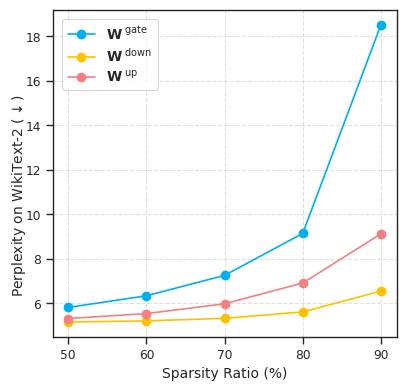

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
sparsity_levels = ['50', '60', '70', '80', '90']
gate_perplexity = [5.8151, 6.3379, 7.2570, 9.1439, 18.5280]
down_perplexity = [5.1583, 5.2101, 5.3252, 5.6147, 6.5511]
up_perplexity = [5.3164, 5.5390, 5.9795, 6.9141, 9.1250]

# 颜色列表
color_list = ["#00B0EC", "#FFC000", "#F38181"]
sns.set(style='ticks', palette='deep', context='paper')

# 创建图形
fig=plt.figure(figsize=(4, 4))

# 绘制折线图
plt.plot(sparsity_levels, gate_perplexity, color=color_list[0], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ gate}$')
plt.plot(sparsity_levels, down_perplexity, color=color_list[1], marker='o', markersize=6, linestyle='-',label='$\mathbf{W}^\mathrm{\ down}$')
plt.plot(sparsity_levels, up_perplexity, color=color_list[2], marker='o', markersize=6, linestyle='-', label='$\mathbf{W}^\mathrm{\ up}$')


plt.xlabel('Sparsity Ratio (%)', fontsize=10)
# plt.ylabel('Perplexity on WikiText-2 ($\downarrow$)', fontsize=10)
fig.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.385, 0.958), columnspacing=0.5, labelspacing=0.3, frameon=True, fontsize=10)
fig.text(0.02, 0.5, 'Perplexity on WikiText-2 ($\downarrow$)', ha='center', va='center', fontsize=10, rotation=90)
# 添加网格线
plt.grid(True, linestyle='--', alpha=0.6)


plt.subplots_adjust(left=0.15, right=0.98, top=0.9, bottom=0.1, hspace=0.3)
# 调整布局
plt.tight_layout()

# 导出为 PDF
plt.savefig("perplexity_vs_sparsity.pdf", format="pdf", bbox_inches="tight", dpi=500)

# 显示图形
plt.show()

柱形图 + 条形图

findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif' not found because none of the following families were found: Calibri
findfont: Generic family 'sans-serif'

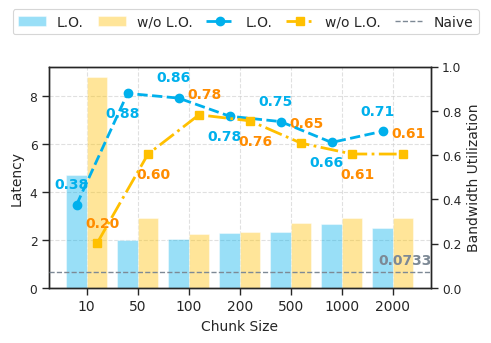

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Matplotlib 和 Seaborn 风格
sns.set(style='ticks', palette='deep', context='paper')
colors = sns.color_palette()

# 设置字体
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Calibri']})

# 数据
chunk_sizes = ['10', '50', '100', '200', '500', '1000', '2000']
with_layout = [4.70313, 2.00764, 2.0571, 2.27406, 2.34771, 2.68449, 2.49281]
without_layout = [8.78512, 2.91906, 2.25586, 2.33724, 2.6968, 2.9159, 2.91704]

# 计算折线数据（1.766 / 柱状图的数据）
with_layout_line = [1.766 / value for value in with_layout]
without_layout_line = [1.766 / value for value in without_layout]

# 自定义颜色
color_list = ["#00B0EC","#FFC000", "#F38181", "#7D8995", "#AAB083", "#CC9564", "#E88C1F"]

# 创建图形
fig, ax1 = plt.subplots(figsize=(5, 3))  # 调整图形大小

# 设置柱状图的位置和宽度
x = np.arange(len(chunk_sizes))  # x轴位置
width = 0.4  # 柱状图的宽度

# 绘制柱状图（主 y 轴）
rects1 = ax1.bar(x - width/2, with_layout, width, label='L.O.', color=color_list[0], alpha=0.4)
rects2 = ax1.bar(x + width/2, without_layout, width, label='w/o L.O.', color=color_list[1], alpha=0.4)

# 设置主 y 轴的标签
ax1.set_xlabel('Chunk Size', fontsize=10)
ax1.set_ylabel('Latency', fontsize=10)
ax1.set_xticks(x)
ax1.set_xticklabels(chunk_sizes, fontsize=10)

# 创建第二个 y 轴（共享 x 轴）
ax2 = ax1.twinx()

# 绘制折线图（第二个 y 轴）
line1 = ax2.plot(x - width/2, with_layout_line, color=color_list[0], marker='o', markersize=6, linestyle='--', linewidth=2, label='L.O.', zorder=10)
line2 = ax2.plot(x + width/2, without_layout_line, color=color_list[1], marker='s', markersize=6, linestyle='-.', linewidth=2, label='w/o L.O.', zorder=10)

# 设置第二个 y 轴的范围为 [0, 1]
ax2.set_ylim(0, 1)

# 设置第二个 y 轴的标签
ax2.set_ylabel('Bandwidth Utilization', fontsize=10)

# 合并图例


# 为折线数据添加标签
def add_line_labels(x_data, y_data, color, offset=0.05):
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        # 动态调整标签的垂直偏移量
        if i % 2 == 0:
            ax2.text(x, y + offset, f'{y:.2f}', color=color, fontsize=10, ha='center', va='bottom', weight='bold')  # 加深颜色并加粗
        else:
            ax2.text(x, y - offset, f'{y:.2f}', color=color, fontsize=10, ha='center', va='top', weight='bold')  # 加深颜色并加粗

# 添加折线数据标签
add_line_labels(x - width/2-0.1, with_layout_line, color=color_list[0], offset=0.06)  # 使用深蓝色
add_line_labels(x + width/2+0.1, without_layout_line, color='darkorange', offset=0.06)  # 使用深橙色

target_value = 1.7659 / 24.1008
ax2.axhline(y=target_value, color=color_list[3], linestyle='--', linewidth=1, label='Naive', zorder=5)

# 添加虚线标签
ax2.text(x[-1]-0.28 , target_value+0.02, f'{target_value:.4f}', color=color_list[3], fontsize=10, va='bottom', ha='left',weight='bold')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.15), columnspacing=1, labelspacing=0.5, frameon=True, fontsize=10)
# 添加网格线
ax1.grid(True, linestyle='--', alpha=0.6)

# 调整布局
plt.subplots_adjust(left=0.15, right=0.85, top=0.8, bottom=0.15, hspace=0.3)
plt.tight_layout()

# 导出为 PDF
plt.savefig("comparison_with_without_layout.pdf", format="pdf", bbox_inches="tight", dpi=500)

# 显示图形
plt.show()